In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
from scipy import signal

## Tides Data

I could not manage to install the python package on my personal PC, however, I am in contact with Niklas for a solution to this problem. Therefore I used the website below for just downloading data sets. The coordinates of the center electrode are given with the height of 5 m above sea level. There is a restriction on the amount of data that is allowed to download at one time. Consequently, I downloaded two separate data sets from 2022-08-09 00:00 until 2022-10-08 00:00 with a sampling interval of 60 seconds (1 minute). The second column "Signal" is the gravity variation in $\dfrac{nm}{s^{2}}$. Due to the data merging, I had to apply <code> pandas.drop_duplicates </code>.


GitHub link:
https://github.com/hydrogeoscience/pygtide

Web-site with a user interface:
https://groundwater.app/app.php?app=pygtide

In [3]:
data1 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_0809_0908_grav.csv", parse_dates=[0])
data2 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_0908_1008_grav.csv", parse_dates=[0])
data3 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_1007_1106_grav.csv", skiprows=2 ,parse_dates=[0])
data4 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_1105_1205_grav.csv", skiprows=2 ,parse_dates=[0])

tides = pd.concat([data1, data2,data3, data4])
tides.rename(columns={'Datetime[UTC+0.0h]':'Datetime', 
                      'Signal [nm/s**2]': 'Signal', 
                      'Tide [nm/s**2]': 'Tide', 
                      'Pole tide [nm/s**2]' : 'Pole_tide', 
                      'LOD tide [nm/s**2]'  : 'LOD_tide'
                     }, inplace=True)
tides.drop_duplicates('Datetime', inplace=True)
tides

Datetime      Signal        Tide  Pole_tide  LOD_tide
0     2022-08-09 00:00:00  861.462922  818.384908  43.421935 -0.343921
1     2022-08-09 00:01:00  861.306205  818.228048  43.422079 -0.343922
2     2022-08-09 00:02:00  861.141826  818.063526  43.422222 -0.343922
3     2022-08-09 00:03:00  860.969657  817.891214  43.422366 -0.343923
4     2022-08-09 00:04:00  860.789571  817.710985  43.422509 -0.343923
...                   ...         ...         ...        ...       ...
43196 2022-12-04 23:56:00 -280.336783 -299.690992  19.316021  0.038188
43197 2022-12-04 23:57:00 -276.557327 -295.911155  19.315687  0.038141
43198 2022-12-04 23:58:00 -272.761100 -292.114548  19.315354  0.038095
43199 2022-12-04 23:59:00 -268.948317 -288.301385  19.315020  0.038048
43200 2022-12-05 00:00:00 -265.119207 -284.471895  19.314686  0.038001

[169921 rows x 5 columns]

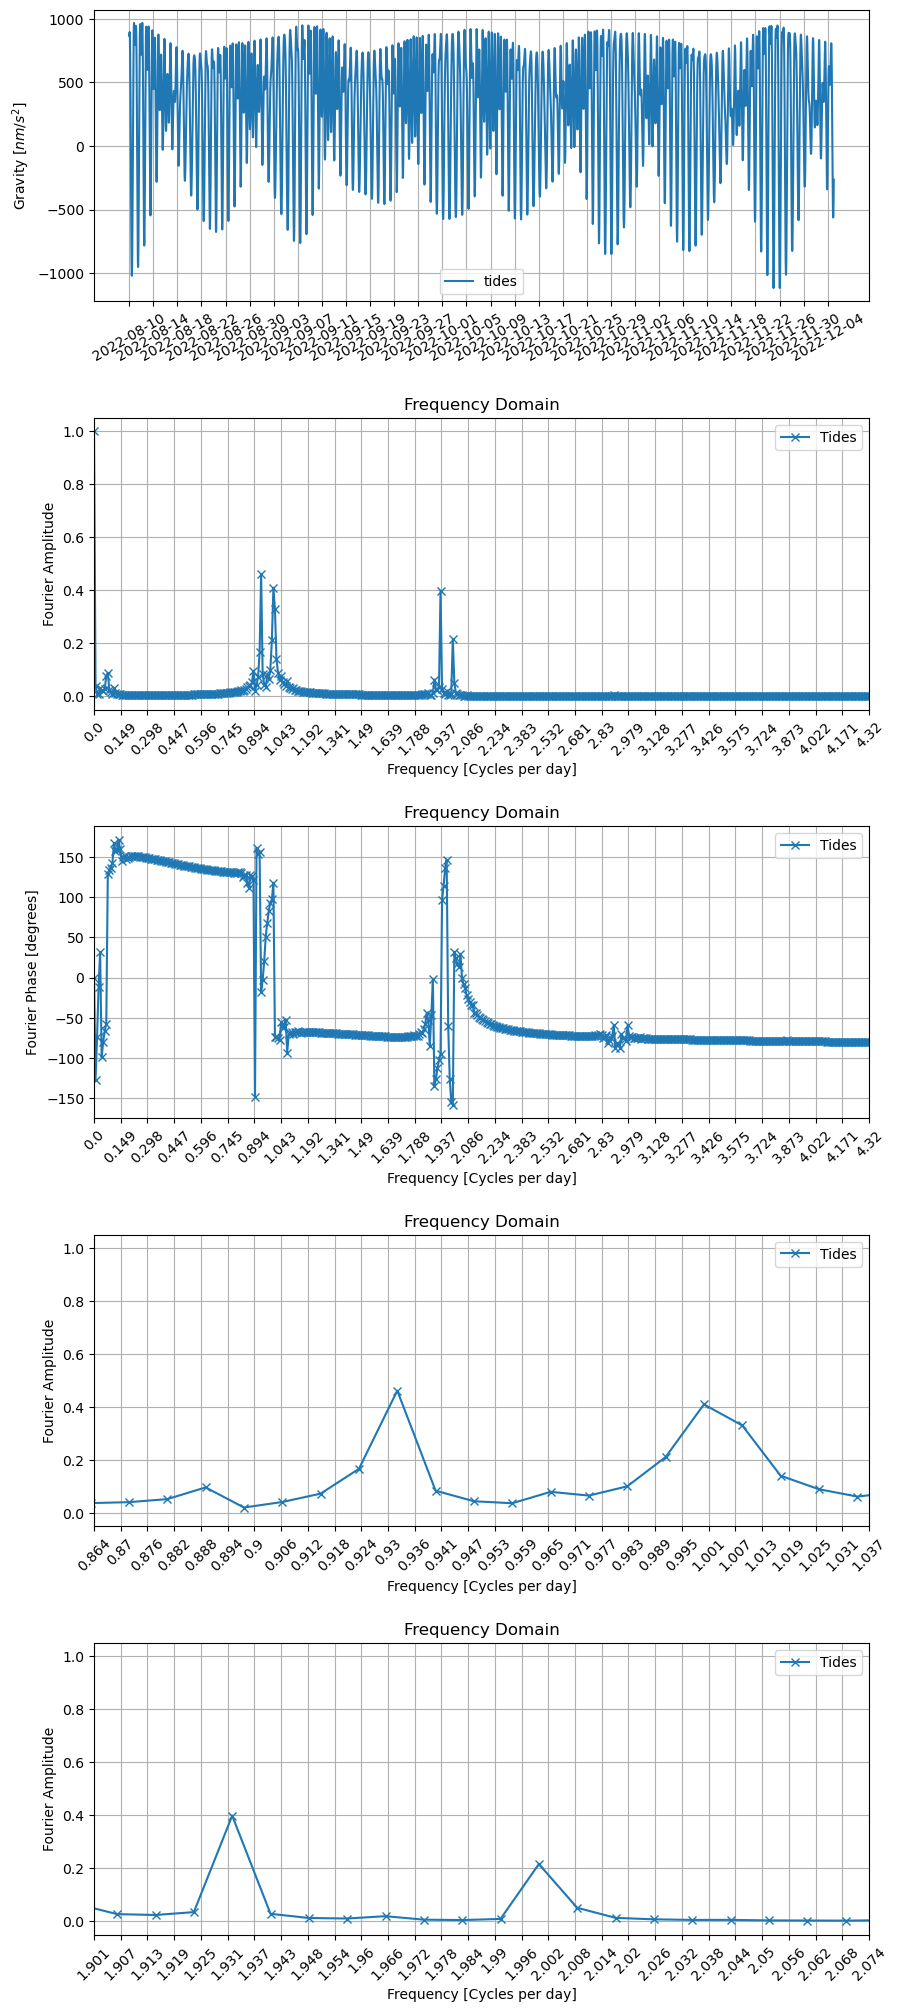

In [4]:
start_date = datetime.datetime(2022,8,10)
end_date = datetime.datetime(2022,12,5)

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)

tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
si = 60
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=si)

one_side = N//2

fig , axes = plt.subplots(5, figsize=(10,5*5))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.set_xticks(days)
ax.tick_params('x',rotation=30)
ax.set_ylabel(r'Gravity $[nm/s^2]$')
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()

ax = axes[3]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_bot = 1 * 10 **(-5)
x_freq_top = 1.2 * 10 **(-5)
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[4]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_bot = 2.2 * 10 **(-5)
x_freq_top = 2.4 * 10 **(-5)
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()
#fig.savefig("Output/Tides_FFT.pdf")

## Geolore Data

We have at the moment gapless (!) data collected by Geolore from 2022-08-10 13:35 until 2022-09-13 14:05 in 8 Hz sampling frequency. However, it took a couple of weeks to encrypt the binary file, and afterwards reading text files was also challenging with regular PCs. As a result, I used the server to read the data and then saved it in pickle format for the next readings on other PCs. The original binary text file is around 250 MB, the encrypted file is around 1.2 GB and the pickle format is half of it 750 MB. However, reading with pickle is much faster than any other option. Geolore has not any internal clock to write the timestamp on each data point, so the date and time information is added by me manually (start time $++ 1/8 s$) before saving it into pickle format.

The total data set has 23,515,468 data points and creating plots or some filtering processes with such an amount is computationally intensive. For that, I downsampled it to 10 seconds sampling interval for further analysis.

In [5]:
geolore_1 = pd.read_pickle("../../Data/2022_09_13_spiekeroog/Geolore/Pickel/df_with_time.pkl")
geolore_2 = pd.read_pickle("../../Data/2022_12_03_spiekeroog/Geolore/df_with_time.pkl")
geolore = pd.concat([geolore_1, geolore_2])
geolore_10s = geolore.resample("10s").last()
geolore_60s = geolore.resample("1min").last()

KeyboardInterrupt: 

In [ ]:
geolore_60s

## Detrend

The data set has to be detrended for a correct FFT analysis. <code> scipy.signal.detrend </code> is used for the detrending. A linear trend has a significant effect on the FFT spectrum of low frequencies. 

(-0.004, 0.012)

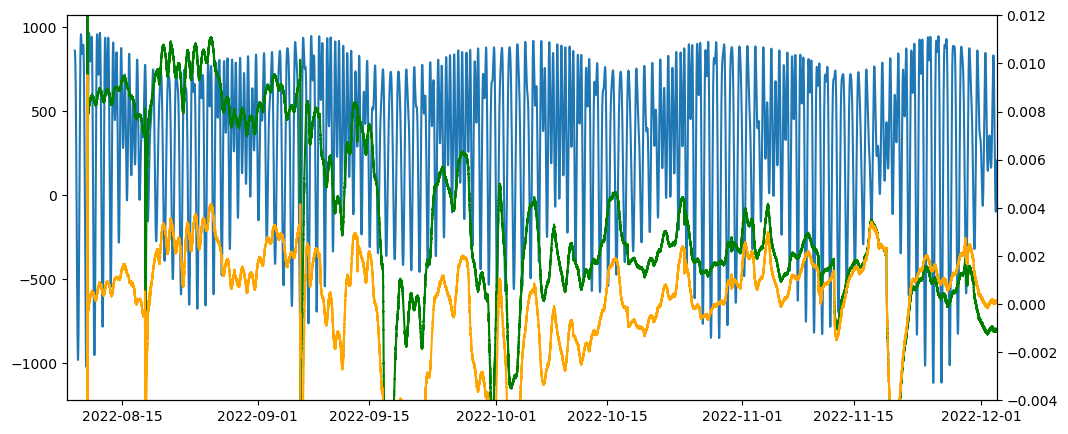

In [48]:
fig, ax = plt.subplots(1 , figsize = (12,5 ))

ax.plot(tides['Datetime'] , tides['Signal'])
ax.set_xlim(datetime.datetime(2022,8,8), datetime.datetime(2022,12,3))



ax1 = ax.twinx()
ax1.plot(geolore_10s.iloc[:,2], color="green")
ax1.plot(geolore_10s.index, signal.detrend(geolore_10s.iloc[:,2]), color="orange")
ax1.set_ylim(-0.004, 0.012)


## FFT of Tides & Geolore Data

It is more suitable if both data sets have the same sampling frequency, to compare the results. Besides that, the FFT of the complete geolore data set shows a lot of noise in low frequencies, therefore the analysis is restricted between two outliers. Also as it is shown in Signal_FFT_test.ipynb, detrending has a significant effect in FFT spectrum of low frequencies.

False


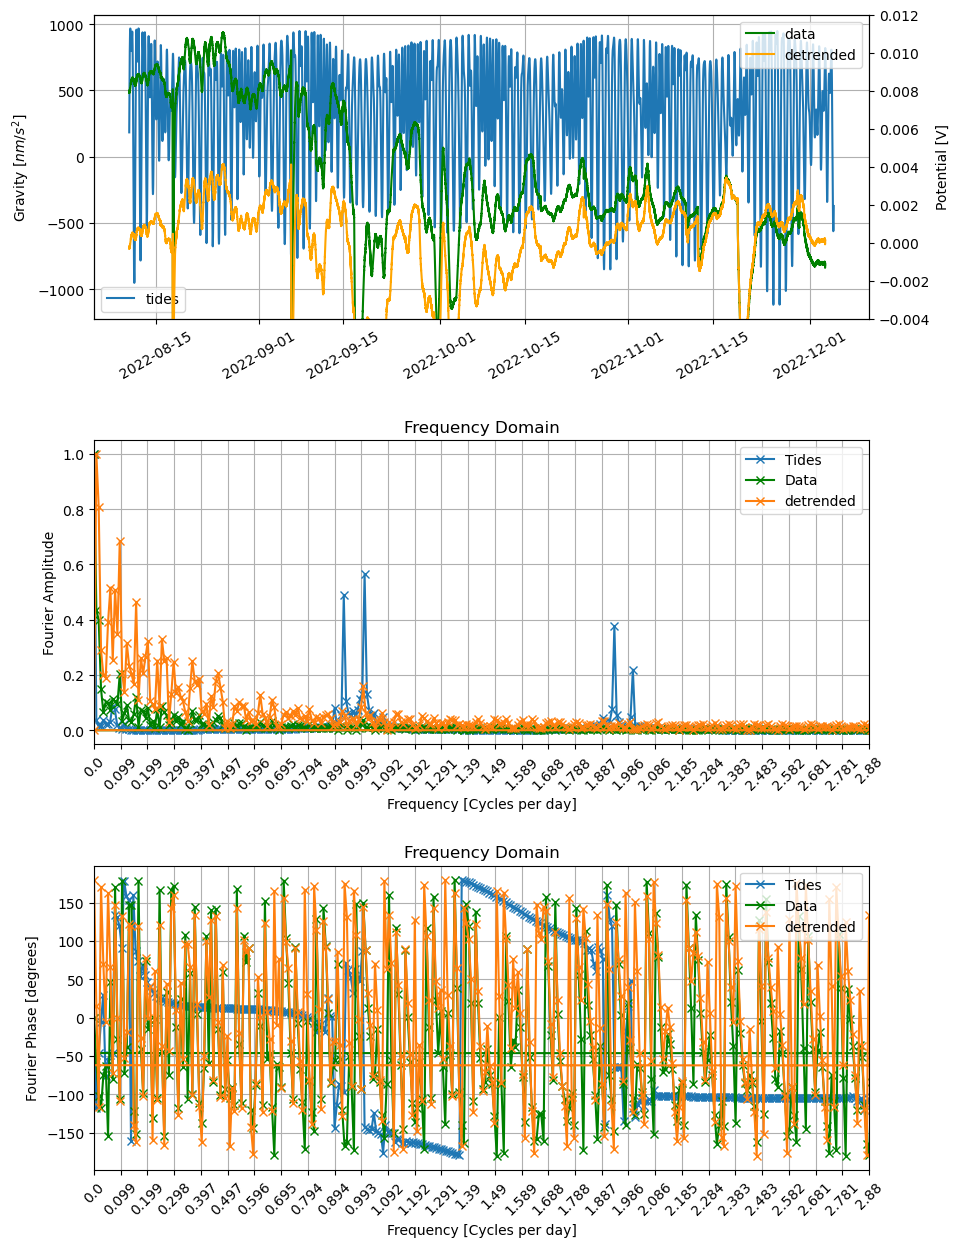

In [49]:
#start_date = datetime.datetime(2022,8,10,15,1,30)
#end_date = datetime.datetime(2022,9,12,23,30)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

start_date = datetime.datetime(2022,8,10,15,1,30)
end_date = datetime.datetime(2022,12,4,23,30)


tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=1 )


geolore_data_dated = geolore_60s[(geolore_60s.index>=start_date) &  (geolore_60s.index<=end_date)]



X_data = geolore_data_dated.iloc[: , 2].values
N_data = len(X_data)
F_data = np.fft.fft(X_data)/N_data
F_data_detrended = np.fft.fft(signal.detrend(geolore_data_dated.iloc[:,2]))/N_data
F_freq_data = np.fft.fftfreq(N_data, d=1)

one_side = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.set_ylabel(r'Gravity $[nm/s^2]$')

ax1 = ax.twinx()
ax1.plot(geolore_data_dated.iloc[:,2], color="green", label="data")
ax1.plot(geolore_data_dated.index , signal.detrend(geolore_data_dated.iloc[:,2]), color="orange", label="detrended")
ax1.set_ylabel('Potential [V]')
ax1.set_ylim(-0.004, 0.012)

ax.tick_params(axis ='x', labelrotation =30)
ax1.tick_params(axis='x',  which='both', bottom=False, top=False, labelbottom=False)
ax1.legend()
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.abs(F_data[:one_side])/max(np.abs(F_data[:one_side])), 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side])/max(np.abs(F_data_detrended[:one_side])),
        'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.angle(F_data[:one_side])*180/np.pi, 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.angle(F_data_detrended[:one_side])*180/np.pi,'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()


print(len(X)==len(X_data))

#fig.savefig("Output/Tides_Geolore_FFT.pdf")

## Filter

In [50]:
si = 60
sec = 1/si #SAMPLING RATE IN SEC
high_freq_hour = 5.5
low_freq_hour  = 7
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  


sos_12 = signal.butter(2, [low_freq, high_freq], 'bandpass', output='sos')

sec = 1/si #SAMPLING RATE IN SEC
high_freq_hour = 11
low_freq_hour  = 12.5
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  


sos_24 = signal.butter(2, [low_freq, high_freq], 'bandpass', output='sos')
#geolore_data_dated_filtered = signal.sosfilt(sos, geolore_data_dated.iloc[: , 2].values)

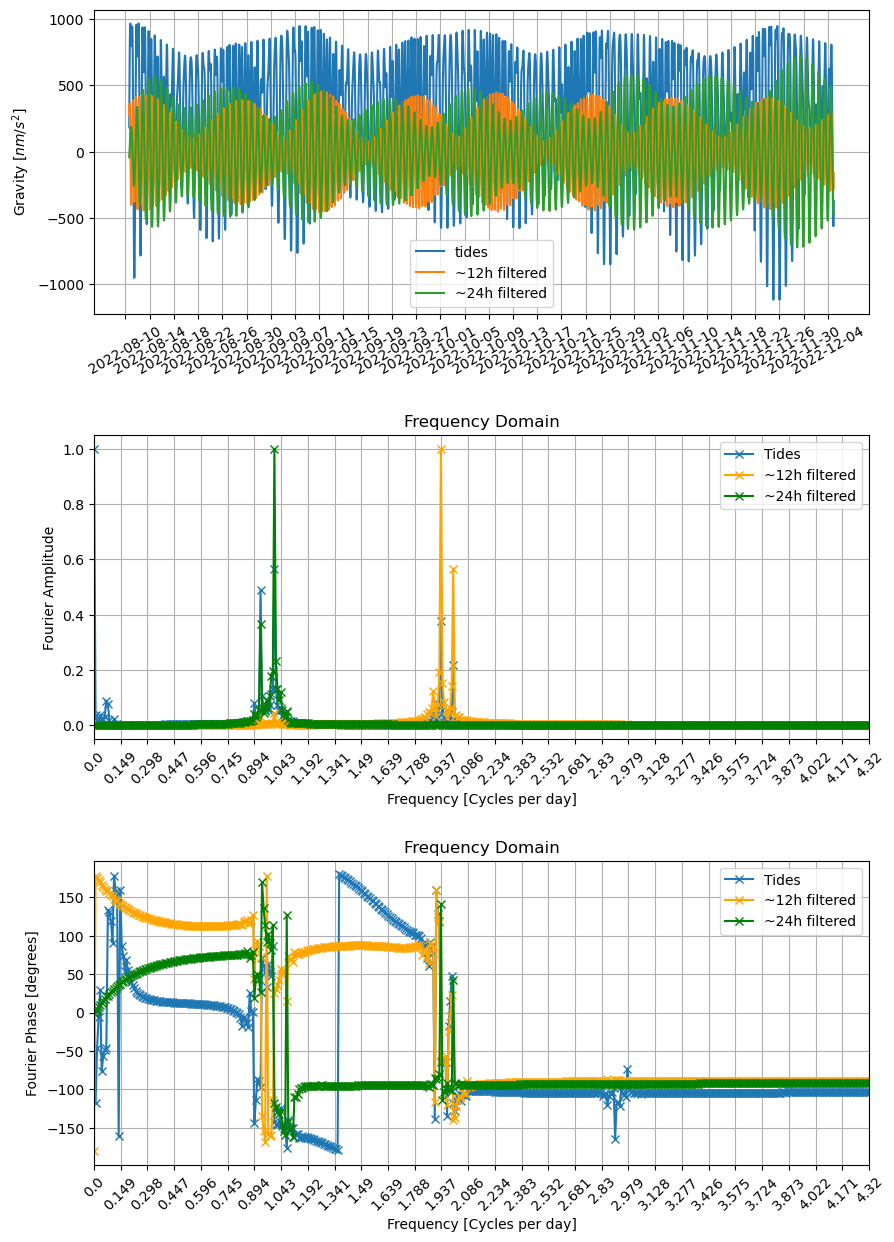

In [51]:
tides["Signal_filtered"] = signal.sosfilt(sos_12, tides["Signal"].values)
tides["Signal_filtered_1"] = signal.sosfilt(sos_24, tides["Signal"].values)


#start_date = datetime.datetime(2022,8,10,15)
#end_date = datetime.datetime(2022,8,21)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

#start_date = datetime.datetime(2022,8,10)
#end_date = datetime.datetime(2022,10,8)

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)

tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=si )

X_filtered = tides_dated['Signal_filtered'].values
F_filtered = np.fft.fft(X_filtered)/N


X_filtered_1 = tides_dated['Signal_filtered_1'].values
F_filtered_1 = np.fft.fft(X_filtered_1)/N

one_side = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.plot(tides_dated['Datetime'] , tides_dated['Signal_filtered'], label="~12h filtered")
ax.plot(tides_dated['Datetime'] , tides_dated['Signal_filtered_1'], label="~24h filtered")
ax.set_ylabel(r'Gravity $[nm/s^2]$')
ax.set_xticks(days)
ax.tick_params(axis ='x', labelrotation =30)
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

ax.plot(F_freq[:one_side], np.abs(F_filtered[:one_side])/max(np.abs(F_filtered[:one_side])), 
        'x-', color='orange',label='~12h filtered')

ax.plot(F_freq[:one_side], np.abs(F_filtered_1[:one_side])/max(np.abs(F_filtered_1[:one_side])), 
        'x-', color='green',label='~24h filtered')


x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

ax.plot(F_freq[:one_side], np.angle(F_filtered[:one_side])*180/np.pi, 
        'x-', color='orange',label='~12h filtered')

ax.plot(F_freq[:one_side], np.angle(F_filtered_1[:one_side])*180/np.pi, 
        'x-', color='green',label='~24h filtered')



x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()

#fig.savefig("Output/Tides_butterworth_filtered_FFT.pdf")

## Cleaning the outliers (in porgress)

periodic spline is needed

https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html


In [52]:
geolore_interpolated = geolore_60s.copy()
geolore_interpolated[~(((geolore_60s.index > datetime.datetime(2022,8,10,14,13)) &
        (geolore_60s.index < datetime.datetime(2022,8,17,18,50))) |
        ((geolore_60s.index > datetime.datetime(2022,8,18,14,0)) &
        (geolore_60s.index < datetime.datetime(2022,9,6,8,22))) |
        (geolore_60s.index > datetime.datetime(2022,9,7,4,45)))] = None
geolore_interpolated_ = geolore_interpolated.interpolate("cubic", order=1).dropna()
geolore_interpolated_nan = geolore_interpolated.dropna()

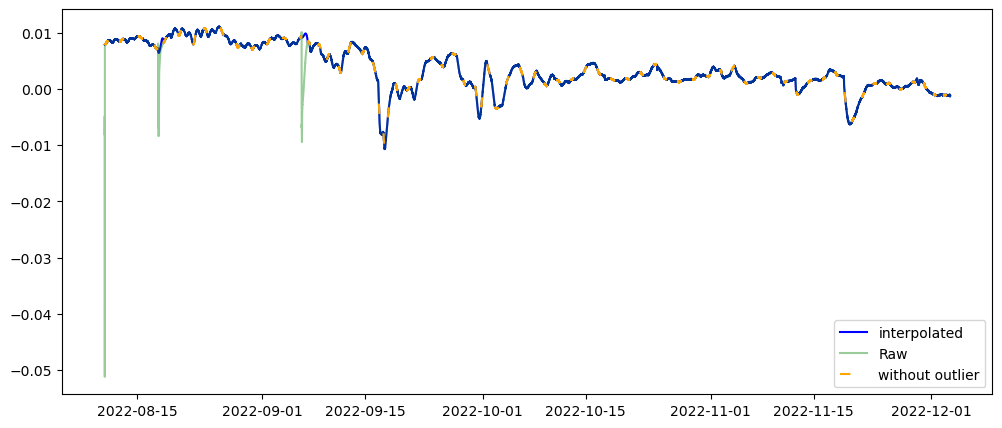

In [54]:
fig, ax = plt.subplots(1 , figsize = (12,5 ))

#ax.set_xlim(datetime.datetime(2022,8,8), datetime.datetime(2022,9,14))
ax.plot(geolore_interpolated_.index, geolore_interpolated_.iloc[:,2], color="blue", label='interpolated')
ax.plot(geolore_60s.iloc[:,2], color="green", alpha=0.4,label='Raw')
ax.plot(geolore_interpolated.index, geolore_interpolated.iloc[:,2], "--" , 
        dashes=(5, 20),  color="orange", label='without outlier')
#ax.set_ylim(0.002, 0.012)
ax.legend()
#ax.set_xlim(datetime.datetime(2022,8,17),datetime.datetime(2022,8,19))

False


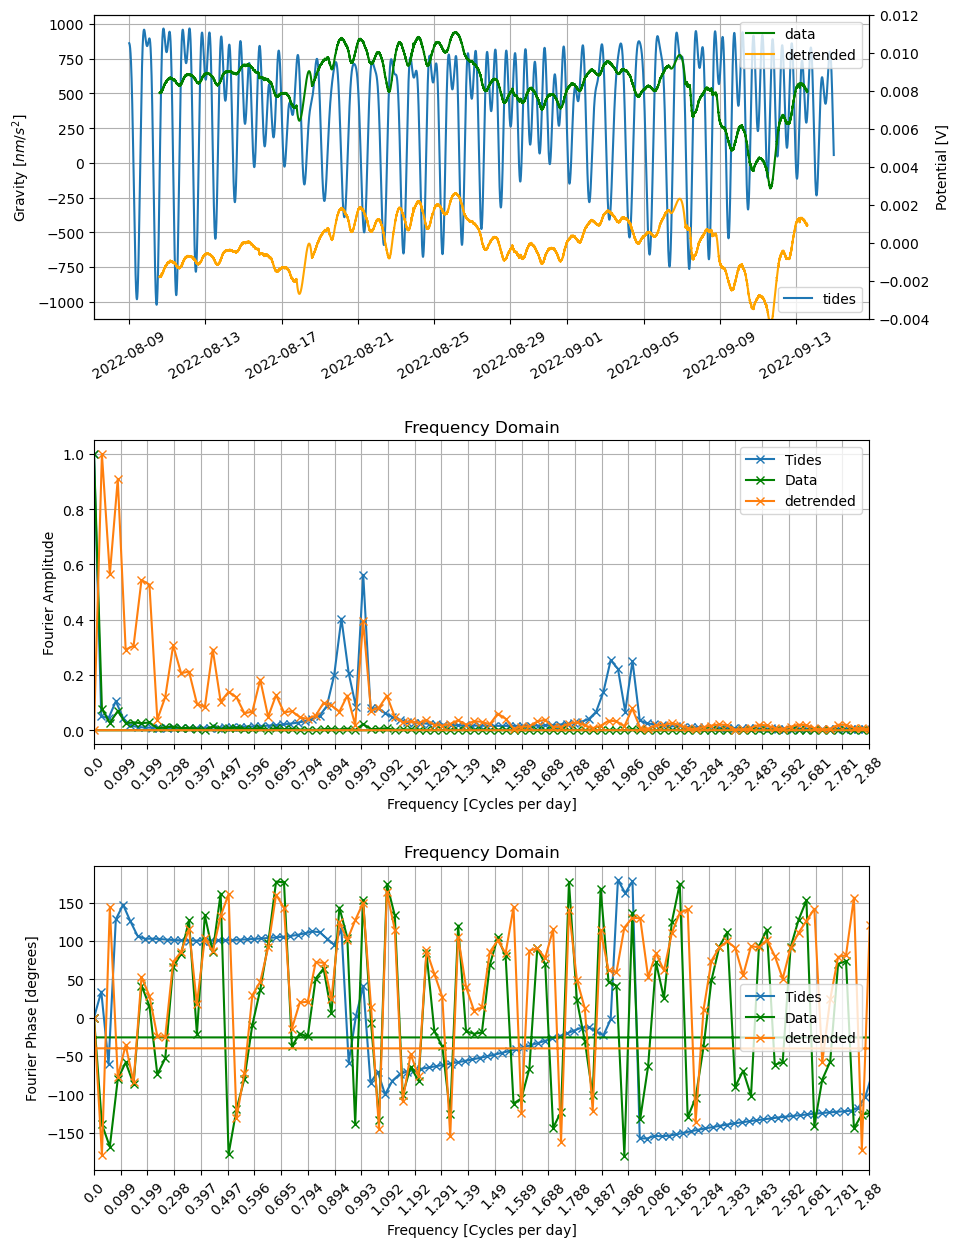

In [83]:
#start_date = datetime.datetime(2022,8,10,15,1,30)
#end_date = datetime.datetime(2022,9,12,23,30)

start_date = datetime.datetime(2022,8,8,15,1,30)
end_date = datetime.datetime(2022,9,14,23,30)


tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=1 )


geolore_data_dated = geolore_interpolated_[(geolore_interpolated_.index>=start_date) &
                                              (geolore_interpolated_.index<=end_date)]



X_data = geolore_data_dated.iloc[: , 2].values
N_data = len(X_data)
F_data = np.fft.fft(X_data)/N_data
F_data_detrended = np.fft.fft(signal.detrend(geolore_data_dated.iloc[:,2]))/N_data
F_freq_data = np.fft.fftfreq(N_data, d=1)

one_side = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.set_ylabel(r'Gravity $[nm/s^2]$')

ax1 = ax.twinx()
ax1.plot(geolore_data_dated.iloc[:,2], color="green", label="data")
ax1.plot(geolore_data_dated.index , signal.detrend(geolore_data_dated.iloc[:,2]), color="orange", label="detrended")
ax1.set_ylabel('Potential [V]')
ax1.set_ylim(-0.004, 0.012)

ax.tick_params(axis ='x', labelrotation =30)
ax1.tick_params(axis='x',  which='both', bottom=False, top=False, labelbottom=False)
ax1.legend()
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.abs(F_data[:one_side])/max(np.abs(F_data[:one_side])), 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side])/max(np.abs(F_data_detrended[:one_side])),
        'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.angle(F_data[:one_side])*180/np.pi, 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.angle(F_data_detrended[:one_side])*180/np.pi,'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()


print(len(X)==len(X_data))

#fig.savefig("Output/Tides_Geolore_FFT.pdf")

In [80]:
geolore_interpolated_

2         3         4
1                                                
2022-08-10 13:35:00       NaN       NaN       NaN
2022-08-10 13:36:00       NaN       NaN       NaN
2022-08-10 13:37:00       NaN       NaN       NaN
2022-08-10 13:38:00       NaN       NaN       NaN
2022-08-10 13:39:00       NaN       NaN       NaN
...                       ...       ...       ...
2022-09-13 14:01:00  0.009535 -0.033650  0.007973
2022-09-13 14:02:00  0.009557 -0.033593  0.007960
2022-09-13 14:03:00  0.009580 -0.033601  0.007983
2022-09-13 14:04:00  0.009582 -0.033599  0.007997
2022-09-13 14:05:00  0.009570 -0.033597  0.007988

[48991 rows x 3 columns]

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [53]:

x_train = (geolore_interpolated_nan.index - geolore_interpolated_nan.index[0]).total_seconds()
X_train = x_train[:, np.newaxis]
y_train = geolore_interpolated_nan.iloc[:,2]

C:\Users\Memo\AppData\Local\Temp\ipykernel_15468\20804454.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = x_train[:, np.newaxis]


In [54]:
transformer = SplineTransformer(
            degree=3,
            knots=np.linspace(0, 2 * np.pi, 10)[:, None],
            extrapolation="periodic")

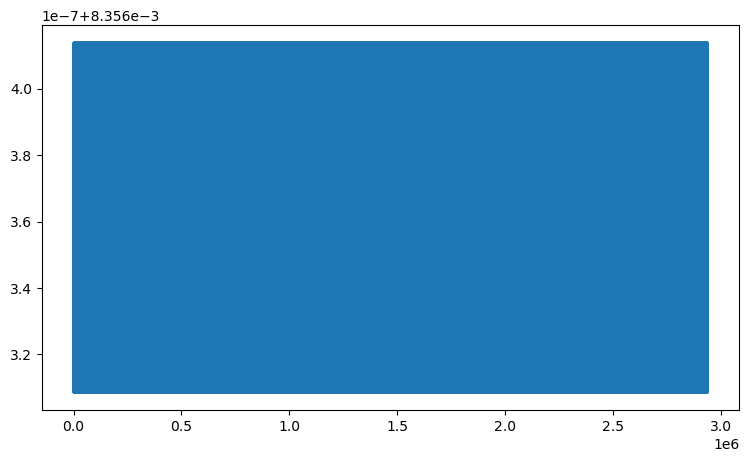

In [59]:
x_plot_ext = np.linspace(x_train[0], x_train[-1], 10**6)
X_plot_ext = x_plot_ext[:, np.newaxis]

model = make_pipeline(transformer, Ridge(alpha=1e-3))
model.fit(X_train, y_train)
y_plot_ext = model.predict(X_plot_ext)

fig ,ax = plt.subplots(1, figsize=(9, 5))
ax.plot()
ax.plot(x_plot_ext, y_plot_ext)